# 817G5 Math & Comp methods of Complex Systems

# Assignment 1
***

### Zhengyang Jin

***

## 1 Analytical Work

### 1.1 Mean-field Equation.

$$\dot{B} =\beta {B \over N}A- \gamma B $$

$$\because A+B=N$$

$$\therefore \dot{B}=\beta {B \over N}(N-B)- \gamma B$$

### 1.2 System Equilibria and stability.
Setting $\dot{B}$ to 0, so we get
$$0=\beta {B \over N}(N-B)- \gamma B$$

$$\beta {1 \over N}(N-B)= \gamma $$

$$\beta -\beta {B \over N}= \gamma $$

$$\therefore B^*=N(1-{\gamma \over \beta}) $$

If we have $R_0={\beta \over \gamma}$, then we got
$$ B^*=N(1-{1 \over R_0}) $$

$$\because N=A^*+B^*$$

$$\therefore A^*=N-N(1-{\gamma \over \beta})={N \over R_0}$$

In [1]:
import numpy as np
from random import expovariate
from matplotlib import pyplot as plt
import multiprocessing as mp
import time
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import interpolate
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

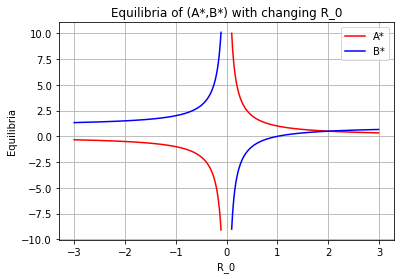

In [3]:
def A_dot_f(beta,gamma,N,a,b):
    return -beta*b/N*a+gamma*b

def B_dot_f(beta,gamma,N,a,b):
    return beta*b/N*a-gamma*b


def A_star_f(N,R0):
    return N/R0
def B_star_f(N,R0):
    return N*(1-1/R0)

N=1
xp=np.arange(-3,-0.1,0.01)
xn=np.arange(0.1,3,0.01)
A_star_1=[N/i for i in xp]
A_star_2=[N/i for i in xn]
B_star_1=[N*(1-1/i) for i in xp]
B_star_2=[N*(1-1/i) for i in xn]
plt.plot(xn,A_star_2,color="red")
plt.plot(xp,A_star_1,color="red",label="A*")
plt.plot(xp,B_star_1,color="blue",label="B*")
plt.plot(xn,B_star_2,color="blue")
plt.xlabel("R_0")
plt.ylabel("Equilibria")
plt.title("Equilibria of (A*,B*) with changing R_0")
plt.grid()
plt.legend()
plt.show()

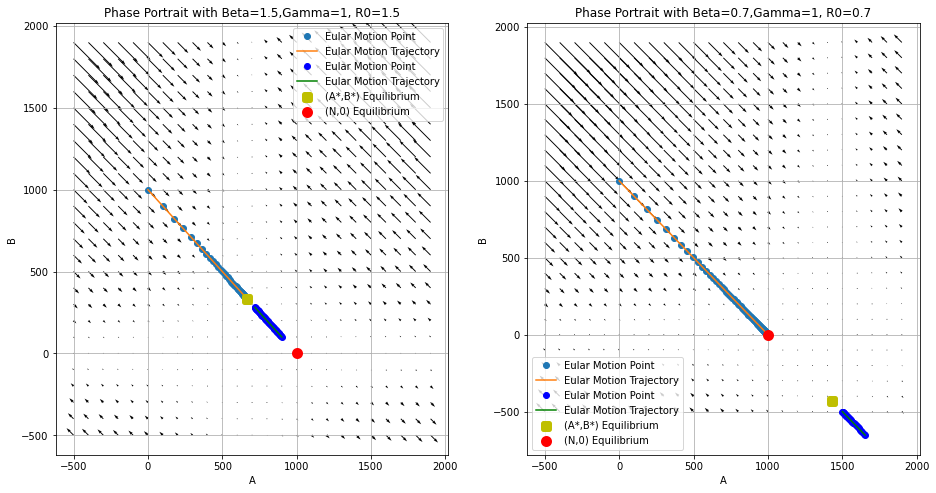

In [4]:
plt.subplots_adjust(0,0,2,1.5)
N=1000
x,y= np.meshgrid(np.arange(-0.5*N,2*N,100),np.arange(-0.5*N,2*N,100))
beta=1.5
gamma=1
R0=beta/gamma
vx=A_dot_f(beta,gamma,N,x,y)
vy=B_dot_f(beta,gamma,N,x,y)
plt.subplot(121)
plt.quiver(x,y,vx,vy)

testpoint=[0,1*N]
#print(A_dot_f(beta,gamma,N,testpoint[0],testpoint[1]))
movelist=[testpoint]
for i in range(50):
    testpoint=[testpoint[0]+0.1*A_dot_f(beta,gamma,N,testpoint[0],testpoint[1]),testpoint[1]+B_dot_f(beta,gamma,N,testpoint[0],testpoint[1])*0.1]
    movelist.append(testpoint)
movelist=np.array(movelist)
plt.plot(movelist.T[0],movelist.T[1],"o",label="Eular Motion Point")
plt.plot(movelist.T[0],movelist.T[1],label="Eular Motion Trajectory")
testpoint1=[0.9*N,0.1*N]
#print(A_dot_f(beta,gamma,N,testpoint[0],testpoint[1]))
movelist1=[testpoint1]
for i in range(50):
    testpoint1=[testpoint1[0]+0.1*A_dot_f(beta,gamma,N,testpoint1[0],testpoint1[1]),testpoint1[1]+B_dot_f(beta,gamma,N,testpoint1[0],testpoint1[1])*0.1]
    movelist1.append(testpoint1)
movelist1=np.array(movelist1)
plt.plot(movelist1.T[0],movelist1.T[1],"o",color="blue",label="Eular Motion Point")
plt.plot(movelist1.T[0],movelist1.T[1],color="g",label="Eular Motion Trajectory")
plt.scatter([A_star_f(N,R0)],[B_star_f(N,R0)],linewidths=5,marker="s", color="y",label="(A*,B*) Equilibrium",zorder=3)
plt.scatter([N],[0],linewidths=5, color="red",label="(N,0) Equilibrium",zorder=3)
plt.title("Phase Portrait with Beta=1.5,Gamma=1, R0=1.5")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.grid()

plt.subplot(122)
beta=0.7
gamma=1
R0=beta/gamma
vx1=A_dot_f(beta,gamma,N,x,y)
vy1=B_dot_f(beta,gamma,N,x,y)
plt.quiver(x,y,vx1,vy1)
testpoint=[0,1*N]
#print(A_dot_f(beta,gamma,N,testpoint[0],testpoint[1]))
movelist=[testpoint]
for i in range(100):
    testpoint=[testpoint[0]+0.1*A_dot_f(beta,gamma,N,testpoint[0],testpoint[1]),testpoint[1]+B_dot_f(beta,gamma,N,testpoint[0],testpoint[1])*0.1]
    movelist.append(testpoint)
movelist=np.array(movelist)
plt.plot(movelist.T[0],movelist.T[1],"o",label="Eular Motion Point")
plt.plot(movelist.T[0],movelist.T[1],label="Eular Motion Trajectory")

testpoint1=[1.5*N,-0.5*N]
movelist1=[testpoint1]
for i in range(30):
    testpoint1=[testpoint1[0]+0.1*A_dot_f(beta,gamma,N,testpoint1[0],testpoint1[1]),testpoint1[1]+B_dot_f(beta,gamma,N,testpoint1[0],testpoint1[1])*0.1]
    movelist1.append(testpoint1)
movelist1=np.array(movelist1)
plt.plot(movelist1.T[0],movelist1.T[1],"o",color="blue",label="Eular Motion Point")
plt.plot(movelist1.T[0],movelist1.T[1],color="g",label="Eular Motion Trajectory")
plt.scatter([A_star_f(N,R0)],[B_star_f(N,R0)],linewidths=5,marker="s", color="y",label="(A*,B*) Equilibrium",zorder=3)
plt.scatter([N],[0],linewidths=5, color="red",label="(N,0) Equilibrium",zorder=3)
plt.title("Phase Portrait with Beta=0.7,Gamma=1, R0=0.7")
plt.xlabel("A")
plt.ylabel("B")
plt.grid()
plt.legend()
plt.show()

According to the above Phase Portrait, we can find that there are two equilibria points. The first one is $(A^*,B^*)$ which will change by different $R_0$ input, and the second is (N,0) follow by N. Also
We can define the following Jacobian matrix J, to analyse the stability of equilibria points.

$$J(A,B)=[\begin{matrix} {\partial f_A={\partial \dot{A} \over \partial A}} &{\partial f_B={\partial \dot{A}\over \partial B}} \\ {\partial g_A={\partial \dot{B}\over \partial A}} & {\partial g_B={\partial \dot{B}\over \partial B}} \end{matrix}]$$
$$=[\begin{matrix} {2\beta A\over N}-\beta-\gamma &{2\beta B\over N}-\beta+\gamma \\ {-2\beta A\over N}+\beta+\gamma &{-2\beta B\over N}+\beta-\gamma\end{matrix}]$$

First, for $(A^*,B^*)$ we can get a new Jacobian matrix
$$J(A^*,B^*)=[\begin{matrix} \gamma -\beta & \beta-\gamma \\ \beta-\gamma &\gamma-\beta \end{matrix}]$$

Then we can get the eigenvalues for $J(A^*,B^*)$:
$$\lambda_1=-2(\beta -\gamma), e_1=[\begin{matrix} 1\\1\end{matrix}]$$
$$\lambda_2=0, e_2=[\begin{matrix} 1\\-1\end{matrix}]$$

So, we can get equilibria $(A^*,B^*)$ is,
Stable, when $\beta >\gamma$, $\lambda =(-\infty, 0)$.
Unknown, when $\beta =\gamma$, $\lambda =(0,0)$.
Unstable, when $\beta <\gamma$, $\lambda =(0, \infty)$.

Second the new Jacobian matrix for $(N,0)$ is
$$J(N,0)=[\begin{matrix} \beta-\gamma & \gamma -\beta \\ \gamma-\beta &\beta-\gamma \end{matrix}]$$

For the eigenvalues are:
$$\lambda_1=2(\beta -\gamma), e_1=[\begin{matrix} 1\\1\end{matrix}]$$
$$\lambda_2=0, e_2=[\begin{matrix} 1\\-1\end{matrix}]$$

So, the equilibria for (N,0) is,
Stable, when $\beta <\gamma$, $\lambda =(-\infty, 0)$.
Unknown, when $\beta =\gamma$, $\lambda =(0,0)$.
Unstable, when $\beta >\gamma$, $\lambda =(0, \infty)$.

### 1.3 System Bifurcation Plot.

In [5]:
R0=np.arange(0.1,5.1,0.1)
B0=np.arange(10,1000,20)

import tqdm
x_list=[]
y_list=[]
z_list=[]
for x in tqdm.tqdm(range(len(B0))):
    for y in range(len(R0)):
        B_dot=B0[x]
        for i in range(300):
            B_dot+=B_dot_f(R0[y],1,1000,N-B_dot,B_dot)
        for i in range(300):
            B_dot+=B_dot_f(R0[y],1,1000,N-B_dot,B_dot)
            x_list.append(B0[x])
            y_list.append(R0[y])
            if 1200>B_dot>=0:
                z_list.append(B_dot)
            else:
                z_list.append(0.0)

  0%|          | 0/50 [00:00<?, ?it/s]c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
100%|██████████| 50/50 [00:02<00:00, 24.61it/s]


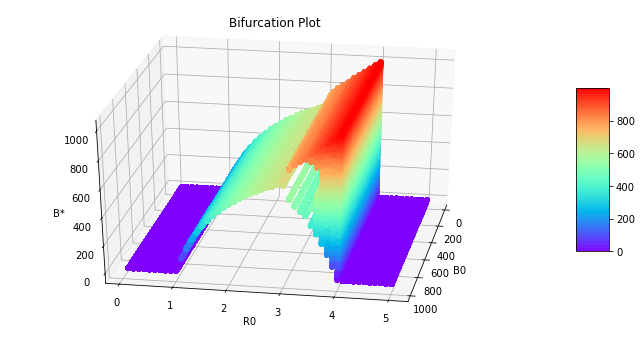

In [6]:
fig=plt.figure(figsize = (12, 6))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
my_cmap = plt.get_cmap('rainbow')
sctt = ax.scatter3D(x_list, y_list, z_list,alpha = 0.8, c = (z_list),cmap = my_cmap,marker ='o')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.xlabel("B0")
plt.ylabel("R0")
plt.title("Bifurcation Plot")
ax.set_zlabel("B*")
ax.view_init(30, 10)
plt.show()

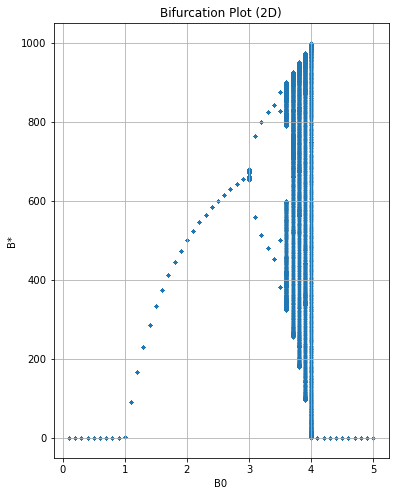

In [7]:
plt.figure(figsize=(6,8))
plt.scatter(y_list,z_list,marker=".",linewidths=0.1)
plt.xlabel("B0")
plt.ylabel("B*")
plt.title("Bifurcation Plot (2D)")
plt.grid()
plt.show()

Integrate by Euler's method(step=1), using parameters N=1000, $\gamma=1$, $\beta$ in range [0.1-5.1) step 0.1, and $B_0$ in range (10,1000) step 20. The image result is displayed $B^*$ is affected by the change of $R_0$, and has nothing to do with the initial value of $B_0$. Due to the output restriction, we can observe that $B^*$ changes with the state of $R_0$. When $R_0$<=1, $B^*$=0. When $R_0$>=3, $B^*$ generates bifurcation. $R_0$>=4, $B^*$ tends to be infinite. (Here I limit it to a value of 0)


### 1.4 Expression obtain for \[B](t)
By adding a $[B]^2$ to left side of our equation. We got,

$${1 \over B^2} \dot{B}={1 \over B^2}(\beta {B \over N}(N-B)- \gamma B)$$
$$=\beta {1 \over B}- {\beta \over N}-{\gamma \over B}$$
$$={\beta -\gamma \over B}-{\beta \over N}$$

Then we define $y={1\over B}$, so we can get,
$$y^2\dot{B}=y(\beta - \gamma)-{\beta \over N}$$

We can set the derivative of y as ${dy\over dB}=-{1\over B^2}=-y^2$

So, we can further get an expressions:
$$-\dot{y} \dot{B}=-{dy\over dB}{dB\over dt}=-y(\beta -\gamma)+{B\over N}$$

Then we can define $\lambda =\beta-\gamma$, $I={\beta \over N}$, so we have
$${dy\over dt}=-\lambda y+I$$

Assume $y(t)=g(t)h(t)$, where $h(t)$ fulfils the homogeneous equation ${dy\over dt}=-\lambda h(t)$, So
$$h(t)=Ce^{-\lambda t}$$

where C is the integration constant. Then we apply the product rule, we have:
$${dy\over dt}=g(t)h'(t)+g'(t)h(t)$$
$$=g(t)(-\lambda)h(t)+g'(t)(Ce^{-\lambda t})$$

$$-\lambda y(t)+I=-\lambda y(t)+g'(t)(Ce^{-\lambda t})$$
$$\therefore I=g'(t)Ce^{-\lambda t}$$

So, re-arranging we have:
$${dg(t)\over dt}={I\over C}e^{-\lambda t}$$
$$\therefore g(t)={I\over C\lambda t}e^{\lambda t}+k$$

Then we can re-write:
$$y(t)=g(t)h(t)=({I\over C\lambda t}e^{\lambda t}+k)Ce^{-\lambda t}={I\over \lambda}+kCe^{-\lambda t}$$

let $Q=k\times C$,so we have $$y(t)={I\over \lambda}+Qe^{-\lambda t}$$

$\because y={1\over B}$ $\lambda =\beta-\gamma$ and $I={\beta \over N}$ has been defined above,
$$\therefore B(t)=({\beta\over N(\beta -\gamma)}+Qe^{-(\beta -\gamma) t})^{-1}$$

when t=0, B(t)=B_0. We got
$$Q={1\over B_0}-{\beta \over N(\beta -\gamma)}$$

Then substitute Q into equation, we can now produce a fully worked out expression for $[B](t)$:
$$B(t)=({\beta \over N(\beta -\gamma)}+({1\over B_0}-{\beta \over N(\beta -\gamma)}e^{-(\beta -\gamma)t}))^{-1}$$

$$\because B^*=N(1-{1\over R_0})={N(\beta -\gamma)\over \beta}$$

$$\therefore B(t)=({1\over B^*}+({1\over B_0}-{1\over B^*})e^{-(\beta -\gamma)})^{-1}$$

### Verification



c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  
c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  


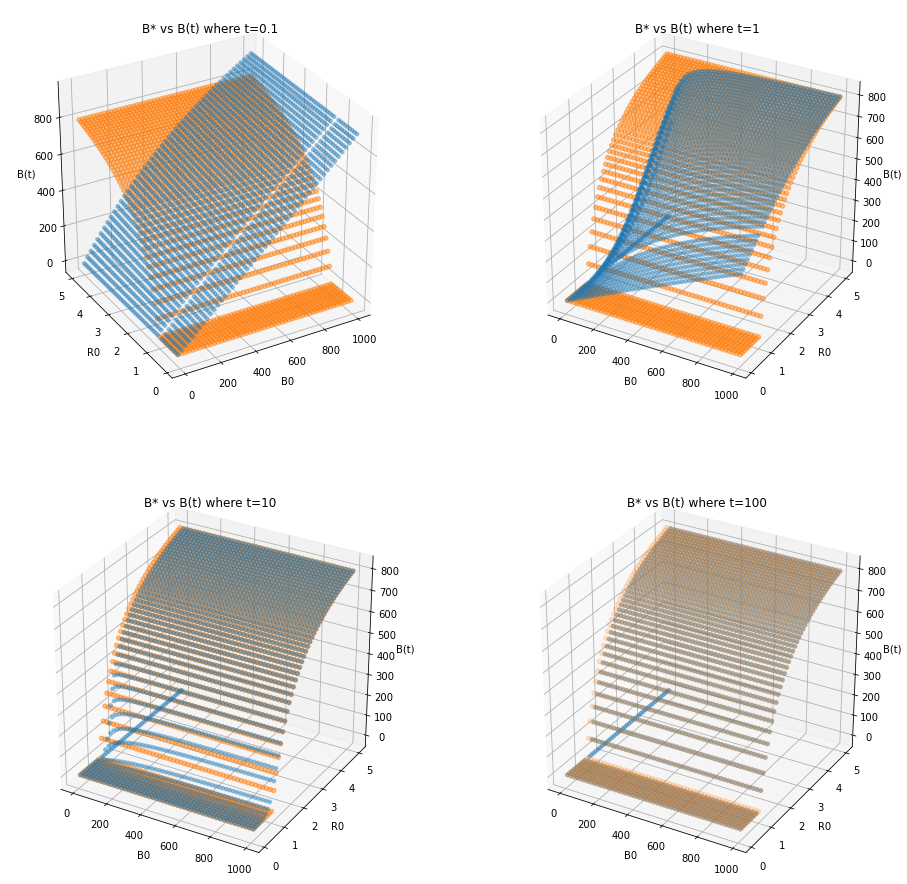

In [6]:
#Beta_=np.arange(0.05,2.55,0.05)
Beta_=np.linspace(2.5,0.05,50)
B0=np.linspace(1000,0,50)
#B0=np.arange(10,1000,20)
Gamma_=0.5
X,Y=np.meshgrid(B0,Beta_/Gamma_)
def Bt_func(Beta,Gamma,N,B0,t):
    return 1/((1/(N*(1-Gamma/Beta)))+(1/B0-1/(N*(1-Gamma/Beta)))*np.exp(-(Beta-Gamma)*t))
Z_Bt=Bt_func(Y,1,N,X,t=0.1)
Z_Bs=np.maximum(B_star_f(1000,Y),0)



fig1=plt.figure(figsize=(16,16))
ax11=fig1.add_subplot(221,projection="3d")

ax11.scatter(X,Y,Bt_func(Y,1,N,X,t=0.1),linewidths=0.1,alpha=0.5)
ax11.scatter(X,Y,Z_Bs,alpha=0.5)
ax11.set_xlabel("B0")
ax11.set_ylabel("R0")
ax11.set_zlabel("B(t)")
ax11.set_title("B* vs B(t) where t=0.1")
ax11.view_init(30, -120)


ax12=fig1.add_subplot(222,projection="3d")
ax12.scatter(X,Y,Bt_func(Y,1,N,X,t=1),linewidths=0.1,alpha=0.5)
ax12.scatter(X,Y,Z_Bs,alpha=0.5)
ax12.set_xlabel("B0")
ax12.set_ylabel("R0")
ax12.set_zlabel("B(t)")
ax12.set_title("B* vs B(t) where t=1")

ax21=fig1.add_subplot(223,projection="3d")
ax21.scatter(X,Y,Bt_func(Y,1,N,X,t=10),linewidths=0.1,alpha=0.5)
ax21.scatter(X,Y,Z_Bs,alpha=0.5)
ax21.set_xlabel("B0")
ax21.set_ylabel("R0")
ax21.set_zlabel("B(t)")
ax21.set_title("B* vs B(t) where t=10")

ax22=fig1.add_subplot(224,projection="3d")
ax22.scatter(X,Y,Bt_func(Y,1,N,X,t=100),linewidths=0.1,alpha=0.5)
ax22.scatter(X,Y,Z_Bs,alpha=0.2)
ax22.set_xlabel("B0")
ax22.set_ylabel("R0")
ax22.set_zlabel("B(t)")
ax22.set_title("B* vs B(t) where t=100")
plt.show()

#### Case of R0=1

Since $R_0$=1, so $\beta = \gamma$, which will cause the denominator to become 0 in our B(t) equation. This will cause a calculation error. From the output image of $B^*$ vs $B(t)$, it can be observed that the result of $R_0$=1 does not exist.

  0%|          | 0/50 [00:00<?, ?it/s]c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 50/50 [00:02<00:00, 20.82it/s]


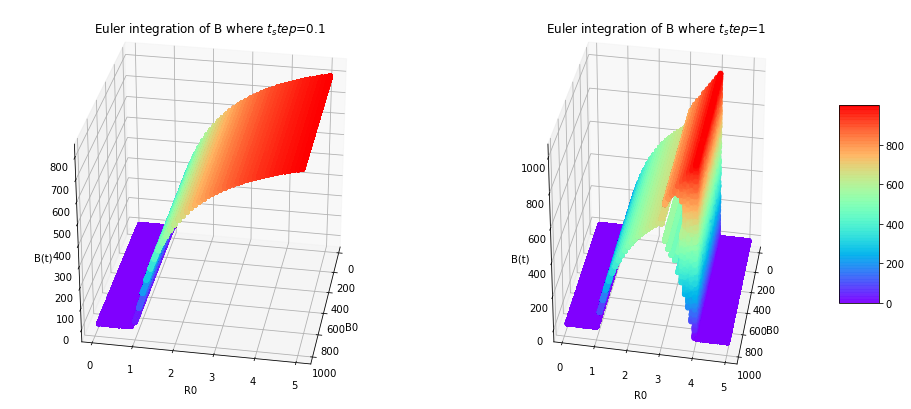

In [7]:
R0=np.arange(0.1,5.1,0.1)
B0=np.arange(10,1000,20)

import tqdm
x_list=[]
y_list=[]
z_list1=[]
z_list2=[]
for x in tqdm.tqdm(range(len(B0))):
    for y in range(len(R0)):
        B_dot1=B0[x]
        B_dot2=B0[x]
        for i in range(300):
            B_dot1+=0.1*B_dot_f(R0[y],1,1000,N-B_dot1,B_dot1)
            B_dot2+=B_dot_f(R0[y],1,1000,N-B_dot2,B_dot2)
        for i in range(100):
            B_dot1+=0.1*B_dot_f(R0[y],1,1000,N-B_dot1,B_dot1)
            B_dot2+=B_dot_f(R0[y],1,1000,N-B_dot2,B_dot2)
            x_list.append(B0[x])
            y_list.append(R0[y])
            if 1200>B_dot1>=0:
                z_list1.append(B_dot1)
            else:
                z_list1.append(0.0)
            if 1200>B_dot2>=0:
                z_list2.append(B_dot2)
            else:
                z_list2.append(0.0)

fig=plt.figure(figsize = (16, 16))
ax11=fig.add_subplot(221,projection="3d")
ax11.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
my_cmap = plt.get_cmap('rainbow')
sctt11 = ax11.scatter3D(x_list, y_list, z_list1,alpha = 0.8, c = (z_list1),cmap = my_cmap,marker ='o')
ax11.set_xlabel("B0")
ax11.set_ylabel("R0")
ax11.set_zlabel("B(t)")
ax11.set_title(r"Euler integration of B where $t_step$=0.1")
ax11.view_init(30, 10)


ax12=fig.add_subplot(222,projection="3d")
ax12.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
sctt12 = ax12.scatter3D(x_list, y_list, z_list2,alpha = 0.8, c = (z_list2),cmap = my_cmap,marker ='o')
fig.colorbar(sctt12, ax = ax12, shrink = 0.5, aspect = 5)
ax12.set_xlabel("B0")
ax12.set_ylabel("R0")
ax12.set_zlabel("B(t)")
ax12.set_title(r"Euler integration of B where $t_step$=1")
ax12.view_init(30, 10)
plt.show()

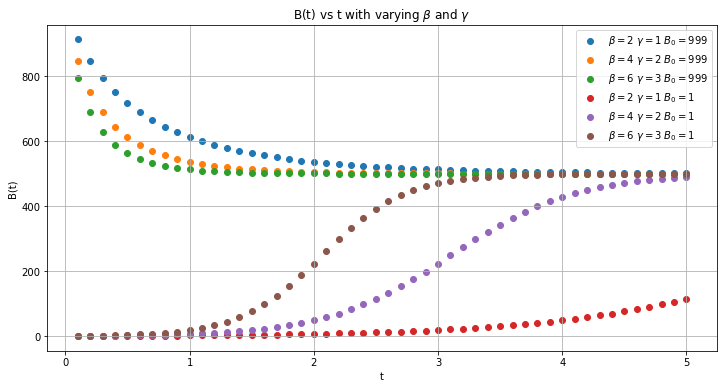

In [8]:
t_=np.arange(0.1,5.1,0.1)
line1=Bt_func(2,1,N,999,t_)
line2=Bt_func(4,2,N,999,t_)
line3=Bt_func(6,3,N,999,t_)
line4=Bt_func(2,1,N,1,t_)
line5=Bt_func(4,2,N,1,t_)
line6=Bt_func(6,3,N,1,t_)
plt.figure(figsize=(12,6))
plt.scatter(t_,line1,label=r"$\beta=2$ $\gamma=1$ $B_0=999$")
plt.scatter(t_,line2,label=r"$\beta=4$ $\gamma=2$ $B_0=999$")
plt.scatter(t_,line3,label=r"$\beta=6$ $\gamma=3$ $B_0=999$")
plt.scatter(t_,line4,label=r"$\beta=2$ $\gamma=1$ $B_0=1$")
plt.scatter(t_,line5,label=r"$\beta=4$ $\gamma=2$ $B_0=1$")
plt.scatter(t_,line6,label=r"$\beta=6$ $\gamma=3$ $B_0=1$")
plt.grid()
plt.xlabel("t")
plt.ylabel("B(t)")
plt.title(r"B(t) vs t with varying $\beta$ and $\gamma$")
plt.legend()
plt.show()

#### B(t) vs t with different $R_0$
According to the output image, we can observe that although the value of $R_0$ remains unchanged, a larger value of $\beta ,\gamma$ will lead to faster convergence. But As the asymptotic equilibria is a function of R0, varying the magnitudes of $\beta,\gamma$ has no effects on its value. Therefore, the result will not be affected by the big $\beta,\gamma$.

***
## 2 Simulation Work

### 2.1 Gillespie Algorithm with different parameter

In [9]:
# 28 November 2021 v1.3
# Luc Berthouze
from random import expovariate # Generate variates from exponential distribution
def gillespie_ABA(N,B0,beta,gamma,Tmax):
    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0]
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation).
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)

    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change
            if state[event]==0: # individual is in state A
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop
        time = T[-1]

    return T,A,B

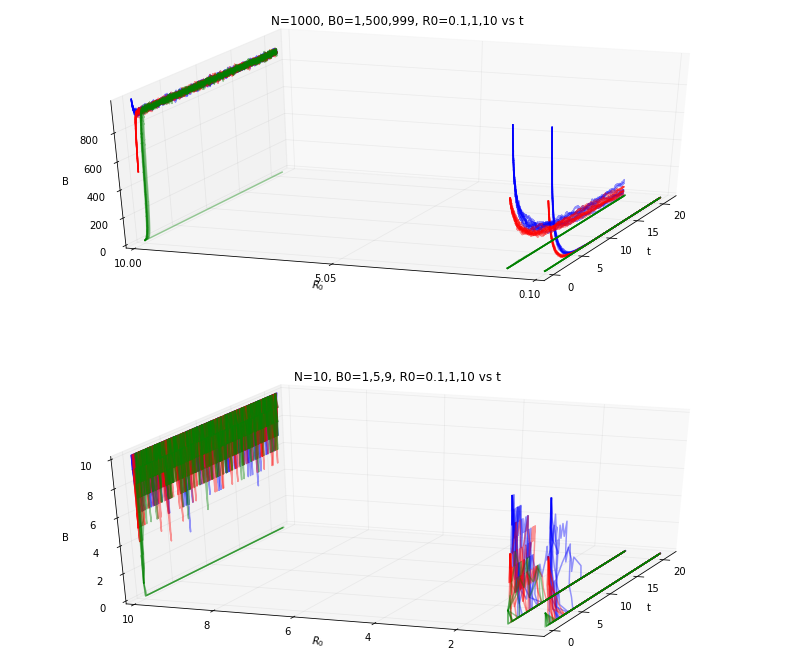

In [100]:
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
fig=plt.figure(figsize = (14, 12))
ax11=fig.add_subplot(211,projection="3d")
for i in range(10):
    T,A,B=gillespie_ABA(1000,999,0.1,1,20)
    ax11.plot3D(T,0.1*np.ones(len(T)),B,color="blue",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(1000,500,0.1,1,20)
    ax11.plot3D(T,0.1*np.ones(len(T)),B,color="red",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(1000,1,0.1,1,20)
    ax11.plot3D(T,0.1*np.ones(len(T)),B,color="g",alpha=0.4)

for i in range(10):
    T,A,B=gillespie_ABA(1000,999,1,1,20)
    ax11.plot3D(T,1*np.ones(len(T)),B,color="blue",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(1000,500,1,1,20)
    ax11.plot3D(T,1*np.ones(len(T)),B,color="red",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(1000,1,1,1,20)
    ax11.plot3D(T,1*np.ones(len(T)),B,color="g",alpha=0.4)

for i in range(10):
    T,A,B=gillespie_ABA(1000,999,10,1,20)
    ax11.plot3D(T,10*np.ones(len(T)),B,color="blue",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(1000,500,10,1,20)
    ax11.plot3D(T,10*np.ones(len(T)),B,color="red",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(1000,1,10,1,20)
    ax11.plot3D(T,10*np.ones(len(T)),B,color="g",alpha=0.4)

ax11.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.1,alpha = 0.1)
ax11.view_init(30, -160)
ax11.yaxis.set_major_locator(LinearLocator(3))
ax11.set_ylim(0.1,10)
ax11.set_xlabel("t")
ax11.set_ylabel(r"$R_0$")
ax11.set_zlabel("B")
ax11.set_title("N=1000, B0=1,500,999, R0=0.1,1,10 vs t")

ax12=fig.add_subplot(212,projection="3d")
for i in range(10):
    T,A,B=gillespie_ABA(10,9,0.1,1,20)
    ax12.plot3D(T,0.1*np.ones(len(T)),B,color="blue",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(10,5,0.1,1,20)
    ax12.plot3D(T,0.1*np.ones(len(T)),B,color="red",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(10,1,0.1,1,20)
    ax12.plot3D(T,0.1*np.ones(len(T)),B,color="g",alpha=0.4)

for i in range(10):
    T,A,B=gillespie_ABA(10,9,1,1,20)
    ax12.plot3D(T,1*np.ones(len(T)),B,color="blue",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(10,5,1,1,20)
    ax12.plot3D(T,1*np.ones(len(T)),B,color="red",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(10,1,1,1,20)
    ax12.plot3D(T,1*np.ones(len(T)),B,color="g",alpha=0.4)

for i in range(10):
    T,A,B=gillespie_ABA(10,9,10,1,20)
    ax12.plot3D(T,10*np.ones(len(T)),B,color="blue",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(10,5,10,1,20)
    ax12.plot3D(T,10*np.ones(len(T)),B,color="red",alpha=0.4)
for i in range(10):
    T,A,B=gillespie_ABA(10,1,10,1,20)
    ax12.plot3D(T,10*np.ones(len(T)),B,color="g",alpha=0.4)

ax12.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.1,alpha = 0.1)
ax12.view_init(30, -160)
#ax12.yaxis.set_major_locator(LinearLocator(3))
ax12.set_ylim(0.1,10)
ax12.set_xlabel("t")
ax12.set_ylabel(r"$R_0$")
ax12.set_zlabel("B")
ax12.set_title("N=10, B0=1,5,9, R0=0.1,1,10 vs t")
plt.show()

#### Plot Analysis
Due to the randomness of the algorithm, the result of each run is different and will never be stable in the equilibrium. And in the figure above, for $R_0=10, B_0=1$, some results did not converge to the asymptotic equilibria, but converged to 0 instead. And you can see from the figure below that if B reaches 0, then it will always be Limited to a value of 0. This is not in line with our theoretical derivation above.

### 2.2 Average and standard deviation of the realisations

In [154]:
def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='blue',alpha=0.3):
    if mode == 1:
        for i in range(len(x1)-1):
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])]+ [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,linewidths=0,color=c))
    if mode == 2:
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))

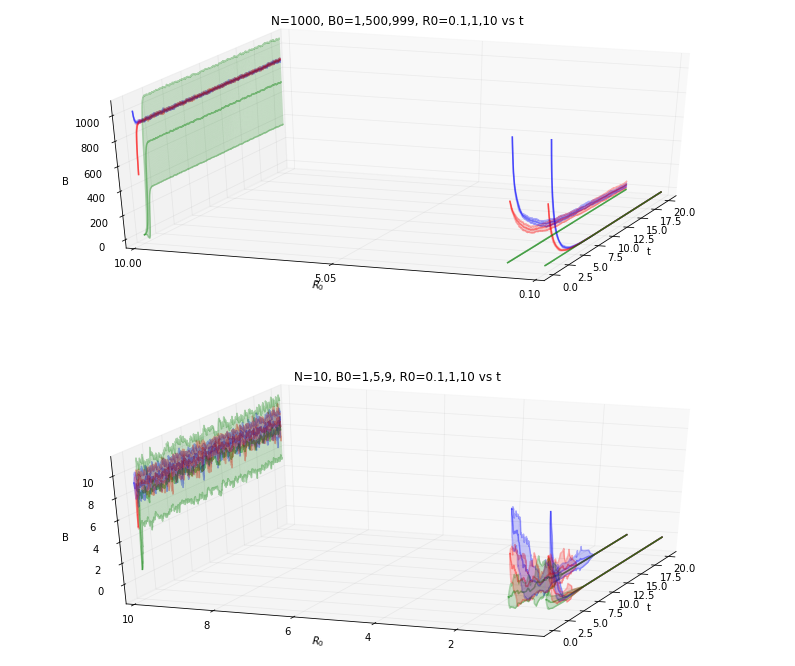

In [159]:
def avg_std_plot3d(ax,N,B0,Beta,Gamma,Tmax,iter_=10,color_='blue'):
    T_=[]
    B_=[]
    for i in range(iter_):
        T,A,B=gillespie_ABA(N,B0,Beta,Gamma,Tmax)
        f = interpolate.interp1d(T, B)
        T_new=np.arange(0,Tmax,0.02)
        B_new=f(T_new)
        T_.append(T_new)
        B_.append(B_new)
    B_=np.array(B_)
    B_average=[]
    B_std=[]
    for i in range(len(B_[0])):
        B_average.append(np.average(B_.T[i]))
        B_std.append(np.std(B_.T[i]))
    B_average=np.array(B_average)
    B_std=np.array(B_std)
    set1=[T_[0],Beta*np.ones(len(T_[0])),B_average+B_std]
    set2=[T_[0],Beta*np.ones(len(T_[0])),B_average-B_std]
    ax.plot3D(*set1,color=color_,alpha=0.3)
    ax.plot3D(*set2,color=color_,alpha=0.3)
    fill_between_3d(ax,*set1,*set2,mode=1,c=color_,alpha=0.2)
    ax.plot3D(T_[0],Beta*np.ones(len(T_[0])),B_average,color=color_,alpha=0.4)

plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
fig=plt.figure(figsize = (14, 12))
ax11=fig.add_subplot(211,projection="3d")
avg_std_plot3d(ax11,1000,999,0.1,1,20,iter_=10,color_="blue")
avg_std_plot3d(ax11,1000,500,0.1,1,20,iter_=10,color_="red")
avg_std_plot3d(ax11,1000,1,0.1,1,20,iter_=10,color_="g")
avg_std_plot3d(ax11,1000,999,1,1,20,iter_=10,color_="blue")
avg_std_plot3d(ax11,1000,500,1,1,20,iter_=10,color_="red")
avg_std_plot3d(ax11,1000,1,1,1,20,iter_=10,color_="g")
avg_std_plot3d(ax11,1000,999,10,1,20,iter_=10,color_="blue")
avg_std_plot3d(ax11,1000,500,10,1,20,iter_=10,color_="red")
avg_std_plot3d(ax11,1000,1,10,1,20,iter_=10,color_="g")
ax11.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.1,alpha = 0.1)
ax11.view_init(30, -160)
ax11.yaxis.set_major_locator(LinearLocator(3))
ax11.set_ylim(0.1,10)
ax11.set_xlabel("t")
ax11.set_ylabel(r"$R_0$")
ax11.set_zlabel("B")
ax11.set_title("N=1000, B0=1,500,999, R0=0.1,1,10 vs t")

ax12=fig.add_subplot(212,projection="3d")
avg_std_plot3d(ax12,10,9,0.1,1,20,iter_=10,color_="blue")
avg_std_plot3d(ax12,10,5,0.1,1,20,iter_=10,color_="red")
avg_std_plot3d(ax12,10,1,0.1,1,20,iter_=10,color_="g")
avg_std_plot3d(ax12,10,9,1,1,20,iter_=10,color_="blue")
avg_std_plot3d(ax12,10,5,1,1,20,iter_=10,color_="red")
avg_std_plot3d(ax12,10,1,1,1,20,iter_=10,color_="g")
avg_std_plot3d(ax12,10,9,10,1,20,iter_=10,color_="blue")
avg_std_plot3d(ax12,10,5,10,1,20,iter_=10,color_="red")
avg_std_plot3d(ax12,10,1,10,1,20,iter_=10,color_="g")
ax12.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.1,alpha = 0.1)
ax12.view_init(30, -160)
#ax12.yaxis.set_major_locator(LinearLocator(3))
ax12.set_ylim(0.1,10)
ax12.set_xlabel("t")
ax12.set_ylabel(r"$R_0$")
ax12.set_zlabel("B")
ax12.set_title("N=10, B0=1,5,9, R0=0.1,1,10 vs t")
plt.show()

#### Average and STD Plot
Due to the randomness of the Gillespie algorithm, the time step of the algorithm is at random intervals, and the length of the generated data is also different. This makes it difficult for us to further analyze multiple results. I use the scipy.interpolate.interp1d() method to resample the data and get the result with a fixed step and length. Then calculate the average and standard deviation. According to the results in the figure, it can be seen that with a small N value, the running state is more unstable.

### 2.3 Mean-field equation contrast

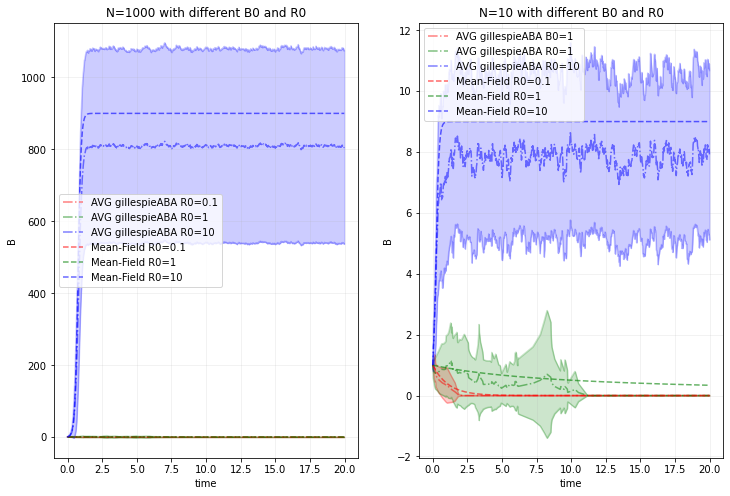

In [15]:
def avg_std_plot2d(ax,N,B0,Beta,Gamma,Tmax,lb=None,iter_=10,color_='blue',func=gillespie_ABA):
    T_=[]
    B_=[]
    for i in range(iter_):
        T,A,B=func(N,B0,Beta,Gamma,Tmax)
        f = interpolate.interp1d(T, B)
        T_new=np.arange(0,Tmax,0.02)
        B_new=f(T_new)
        T_.append(T_new)
        B_.append(B_new)
    B_=np.array(B_)
    B_average=[]
    B_std=[]
    for i in range(len(B_[0])):
        B_average.append(np.average(B_.T[i]))
        B_std.append(np.std(B_.T[i]))
    B_average=np.array(B_average)
    B_std=np.array(B_std)
    ax.plot(T_[0],B_average+B_std,color=color_,alpha=0.2)
    ax.plot(T_[0],B_average-B_std,color=color_,alpha=0.2)
    ax.fill_between(T_[0],B_average+B_std,B_average-B_std,color=color_,alpha=0.2)
    ax.plot(T_[0],B_average,color=color_,alpha=0.5,ls="-.",label=lb)

fig=plt.figure(figsize = (12, 8))
ax121=fig.add_subplot(121)
#avg_std_plot2d(ax121,1000,999,0.1,1,20,iter_=10,color_="blue",lb="AVG gillespieABA B0=999")
#avg_std_plot2d(ax121,1000,500,0.1,1,20,iter_=10,color_="red",lb="AVG gillespieABA B0=500")
avg_std_plot2d(ax121,1000,1,0.1,1,20,iter_=10,color_="r",lb="AVG gillespieABA R0=0.1")
#avg_std_plot2d(ax121,1000,999,1,1,20,iter_=10,color_="blue")
#avg_std_plot2d(ax121,1000,500,1,1,20,iter_=10,color_="red")
avg_std_plot2d(ax121,1000,1,1,1,20,iter_=10,color_="g",lb="AVG gillespieABA R0=1")
#avg_std_plot2d(ax121,1000,999,10,1,20,iter_=10,color_="blue")
#avg_std_plot2d(ax121,1000,500,10,1,20,iter_=10,color_="red")
avg_std_plot2d(ax121,1000,1,10,1,20,iter_=10,color_="b",lb="AVG gillespieABA R0=10")
#ax121.plot(np.arange(0,20,0.02),Bt_func(0.1,1,1000,999,np.arange(0,20,0.02)),color="blue",label="AVG Mean-Field B0=999",alpha=0.6,ls="--")
#ax121.plot(np.arange(0,20,0.02),Bt_func(0.1,1,1000,500,np.arange(0,20,0.02)),color="red",label="AVG Mean-Field B0=500",alpha=0.6,ls="--")
ax121.plot(np.arange(0,20,0.02),Bt_func(0.1,1,1000,1,np.arange(0,20,0.02)),color="r",label="Mean-Field R0=0.1",alpha=0.6,ls="--")
#ax121.plot(np.arange(0,20,0.02),Bt_func(1.001,1,1000,999,np.arange(0,20,0.02)),color="blue",alpha=0.6,ls="--")
#ax121.plot(np.arange(0,20,0.02),Bt_func(1.001,1,1000,500,np.arange(0,20,0.02)),color="red",alpha=0.6,ls="--")
ax121.plot(np.arange(0,20,0.02),Bt_func(1.001,1,1000,1,np.arange(0,20,0.02)),color="g",label="Mean-Field R0=1",alpha=0.6,ls="--")
#ax121.plot(np.arange(0,20,0.02),Bt_func(10,1,1000,999,np.arange(0,20,0.02)),color="blue",alpha=0.6,ls="--")
#ax121.plot(np.arange(0,20,0.02),Bt_func(10,1,1000,500,np.arange(0,20,0.02)),color="red",alpha=0.6,ls="--")
ax121.plot(np.arange(0,20,0.02),Bt_func(10,1,1000,1,np.arange(0,20,0.02)),color="b",label="Mean-Field R0=10",alpha=0.6,ls="--")
ax121.set_title("N=1000 with different B0 and R0")
ax121.set_xlabel("time")
ax121.set_ylabel("B")
ax121.legend()
ax121.grid(alpha=0.2)


ax122=fig.add_subplot(122)
#avg_std_plot2d(ax122,10,9,0.1,1,20,iter_=10,color_="blue",lb="AVG gillespieABA B0=9")
#avg_std_plot2d(ax122,10,5,0.1,1,20,iter_=10,color_="red",lb="AVG gillespieABA B0=5")
avg_std_plot2d(ax122,10,1,0.1,1,20,iter_=10,color_="r",lb="AVG gillespieABA B0=1")
#avg_std_plot2d(ax122,10,9,1,1,20,iter_=10,color_="blue")
#avg_std_plot2d(ax122,10,5,1,1,20,iter_=10,color_="red")
avg_std_plot2d(ax122,10,1,1,1,20,iter_=10,color_="g",lb="AVG gillespieABA R0=1")
#avg_std_plot2d(ax122,10,9,10,1,20,iter_=10,color_="blue")
#avg_std_plot2d(ax122,10,5,10,1,20,iter_=10,color_="red")
avg_std_plot2d(ax122,10,1,10,1,20,iter_=10,color_="b",lb="AVG gillespieABA R0=10")
#ax122.plot(np.arange(0,20,0.02),Bt_func(0.1,1,10,9,np.arange(0,20,0.02)),color="blue",label="AVG Mean-Field B0=9",alpha=0.6,ls="--")
#ax122.plot(np.arange(0,20,0.02),Bt_func(0.1,1,10,5,np.arange(0,20,0.02)),color="red",label="AVG Mean-Field B0=5",alpha=0.6,ls="--")
ax122.plot(np.arange(0,20,0.02),Bt_func(0.1,1,100,1,np.arange(0,20,0.02)),color="r",label="Mean-Field R0=0.1",alpha=0.6,ls="--")
#ax122.plot(np.arange(0,20,0.02),Bt_func(1.001,1,10,9,np.arange(0,20,0.02)),color="blue",alpha=0.6,ls="--")
#ax122.plot(np.arange(0,20,0.02),Bt_func(1.001,1,10,5,np.arange(0,20,0.02)),color="red",alpha=0.6,ls="--")
ax122.plot(np.arange(0,20,0.02),Bt_func(1.001,1,10,1,np.arange(0,20,0.02)),color="g",label="Mean-Field R0=1",alpha=0.6,ls="--")
#ax122.plot(np.arange(0,20,0.02),Bt_func(10,1,10,9,np.arange(0,20,0.02)),color="blue",alpha=0.6,ls="--")
#ax122.plot(np.arange(0,20,0.02),Bt_func(10,1,10,5,np.arange(0,20,0.02)),color="red",alpha=0.6,ls="--")
ax122.plot(np.arange(0,20,0.02),Bt_func(10,1,10,1,np.arange(0,20,0.02)),color="b",label="Mean-Field R0=10",alpha=0.6,ls="--")
ax122.set_title("N=10 with different B0 and R0")
ax122.set_xlabel("time")
ax122.set_ylabel("B")
ax122.legend()
ax122.grid(alpha=0.2)
plt.show()

For a large N parameter input, the average trajectory of the result is relatively consistent with the result of the average field. However, when the value of N is small, the results of the two methods are quite different, and Gillespie is lower than the average field method. I think it may be due to some Gillespie results falling into zero-equilibrium. And since the population is N and R0 is larger, the trend of B can oscillate further below the equilibria than above it.

### 2.4 Improvement of Gillespie and mean-field

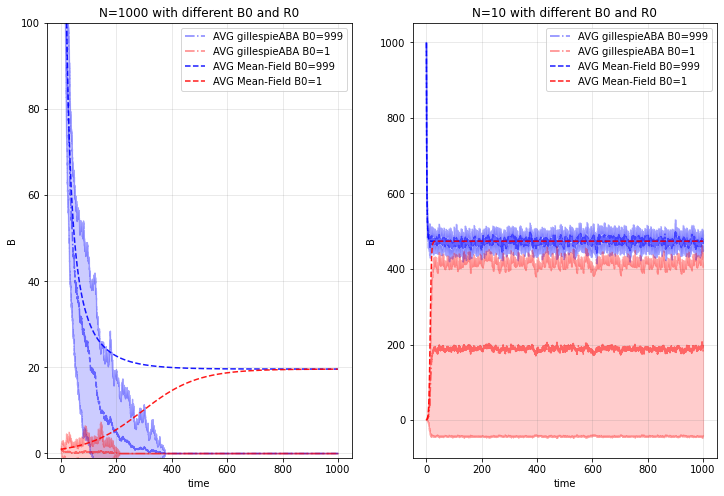

In [236]:
fig=plt.figure(figsize = (12, 8))
ax121=fig.add_subplot(121)
avg_std_plot2d(ax121,1000,999,0.51,0.5,1000,iter_=100,color_="blue",lb="AVG gillespieABA B0=999")
avg_std_plot2d(ax121,1000,1,0.51,0.5,1000,iter_=100,color_="red",lb="AVG gillespieABA B0=1")
ax121.plot(np.arange(0,1000,0.02),Bt_func(0.51,0.5,1000,999,np.arange(0,1000,0.02)),color="blue",label="AVG Mean-Field B0=999",alpha=0.9,ls="--")
ax121.plot(np.arange(0,1000,0.02),Bt_func(0.51,0.5,1000,1,np.arange(0,1000,0.02)),color="red",label="AVG Mean-Field B0=1",alpha=0.9,ls="--")
ax121.set_title("N=1000 with different B0 and R0")
ax121.set_xlabel("time")
ax121.set_ylabel("B")
ax121.set_ylim(-1,100)
ax121.legend()
ax121.grid(alpha=0.2)

ax122=fig.add_subplot(122)
avg_std_plot2d(ax122,1000,999,0.95,0.5,1000,iter_=10,color_="blue",lb="AVG gillespieABA B0=999")
avg_std_plot2d(ax122,1000,1,0.95,0.5,1000,iter_=10,color_="red",lb="AVG gillespieABA B0=1")
ax122.plot(np.arange(0,1000,0.02),Bt_func(0.95,0.5,1000,999,np.arange(0,1000,0.02)),color="blue",label="AVG Mean-Field B0=999",alpha=0.9,ls="--")
ax122.plot(np.arange(0,1000,0.02),Bt_func(0.95,0.5,1000,1,np.arange(0,1000,0.02)),color="red",label="AVG Mean-Field B0=1",alpha=0.9,ls="--")
ax122.set_title("N=10 with different B0 and R0")
ax122.set_xlabel("time")
ax122.set_ylabel("B")
ax122.legend()
ax122.grid(alpha=0.2)
plt.show()

/tmp/ipykernel_108597/3494271016.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(res):


(100, 50000)
-209.75615859031677


/tmp/ipykernel_108597/3494271016.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(res):


(100, 50000)
-120.81808853149414


/tmp/ipykernel_108597/3494271016.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(res):


(10, 50000)
-605.8544132709503


/tmp/ipykernel_108597/3494271016.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for i in np.array(res):


(10, 50000)
-577.3771197795868


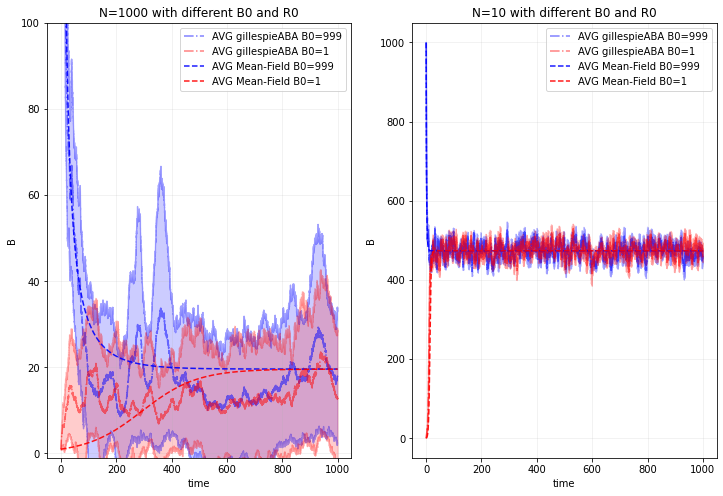

In [5]:
def gillespie_ABA_M(alist):
    N=alist[0]
    B0=alist[1]
    beta=alist[2]
    gamma=alist[3]
    Tmax=alist[4]
    A=[N-B0]
    B=[B0]
    T=[0]
    state = np.random.permutation([0]*(N-B0)+[1]*B0)
    B_contacts = np.where(state==1)[0]
    rate_vector = B0*beta*np.ones((N,1))/N
    rate_vector[B_contacts] = gamma
    time = 0
    while time<=Tmax+0.5:
        rate = np.sum(rate_vector)
        cumrate = np.cumsum(rate_vector)
        if rate > 0.000001:
            tstep = expovariate(rate)
            T.append(T[-1]+tstep)

            # Below,forced to switch the selected individual to A.
            if beta>gamma and sum(state==1)==1:
                event=np.random.choice(np.where(state==0)[0])
            else:
                event = np.where(cumrate>np.random.rand()*rate)[0][0]

            if state[event]==0:
                A.append(A[-1]-1)
                B.append(B[-1]+1)
                state[event] = 1
                rate_vector[event] = gamma
                A_contacts = np.where(state==0)[0]
                rate_vector[A_contacts] += beta/N
            else:
                B.append(B[-1]-1)
                A.append(A[-1]+1)
                state[event] = 0
                A_contacts = np.where(state==0)[0]
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N
        else:
            time = T[-1]
            while time <= Tmax + 0.5:
                A.append(A[-1])
                B.append(B[-1])
                T.append(T[-1]+0.5)
                time = T[-1]
        # Update time and proceed with loop
        time = T[-1]
    return T,A,B
def MPavg_std_plot2d(ax,N,B0,Beta,Gamma,Tmax,lb=None,iter_=10,color_='blue',func=gillespie_ABA_M):
    start=time.time()
    pool=mp.Pool()
    MP_inputs=[]
    for i in range(iter_):
        MP_inputs.append([N,B0,Beta,Gamma,Tmax])
    res=pool.map(func,MP_inputs)
    T_=[]
    B_=[]
    for i in np.array(res):
        f = interpolate.interp1d(i[0], i[-1])
        T_new=np.arange(0,Tmax,0.02)
        B_new=f(T_new)
        T_.append(T_new)
        B_.append(B_new)
    B_=np.array(B_)
    print(B_.shape)
    B_average=np.average(B_,axis=0)
    B_std=np.std(B_,axis=0)
    ax.plot(T_[0],B_average+B_std,color=color_,alpha=0.2)
    ax.plot(T_[0],B_average-B_std,color=color_,alpha=0.2)
    ax.fill_between(T_[0],B_average+B_std,B_average-B_std,color=color_,alpha=0.2)
    ax.plot(T_[0],B_average,color=color_,alpha=0.5,ls="-.",label=lb)
    print(time.time()-start)
fig=plt.figure(figsize = (12, 8))
ax121=fig.add_subplot(121)
MPavg_std_plot2d(ax121,1000,999,0.51,0.5,1000,iter_=100,color_="blue",lb="AVG gillespieABA B0=999",func=gillespie_ABA_M)
MPavg_std_plot2d(ax121,1000,1,0.51,0.5,1000,iter_=100,color_="red",lb="AVG gillespieABA B0=1",func=gillespie_ABA_M)
ax121.plot(np.arange(0,1000,0.02),Bt_func(0.51,0.5,1000,999,np.arange(0,1000,0.02)),color="blue",label="AVG Mean-Field B0=999",alpha=0.9,ls="--")
ax121.plot(np.arange(0,1000,0.02),Bt_func(0.51,0.5,1000,1,np.arange(0,1000,0.02)),color="red",label="AVG Mean-Field B0=1",alpha=0.9,ls="--")
ax121.set_title("N=1000 with different B0 and R0")
ax121.set_xlabel("time")
ax121.set_ylabel("B")
ax121.set_ylim(-1,100)
ax121.legend()
ax121.grid(alpha=0.2)

ax122=fig.add_subplot(122)
MPavg_std_plot2d(ax122,1000,999,0.95,0.5,1000,iter_=10,color_="blue",lb="AVG gillespieABA B0=999",func=gillespie_ABA_M)
MPavg_std_plot2d(ax122,1000,1,0.95,0.5,1000,iter_=10,color_="red",lb="AVG gillespieABA B0=1",func=gillespie_ABA_M)
ax122.plot(np.arange(0,1000,0.02),Bt_func(0.95,0.5,1000,999,np.arange(0,1000,0.02)),color="blue",label="AVG Mean-Field B0=999",alpha=0.9,ls="--")
ax122.plot(np.arange(0,1000,0.02),Bt_func(0.95,0.5,1000,1,np.arange(0,1000,0.02)),color="red",label="AVG Mean-Field B0=1",alpha=0.9,ls="--")
ax122.set_title("N=10 with different B0 and R0")
ax122.set_xlabel("time")
ax122.set_ylabel("B")
ax122.legend()
ax122.grid(alpha=0.2)
plt.show()

#### Algorithm optimization
In the above work, I investigated the difference in results between the mean-field solution and the Gillespie algorithm. In the above 2d image, on the left, it can be observed that Gillespie tends to converge to zero, while the average field converges to 20. On the right, when $B_0=1$, the Gillespie average is lower than the mean-field result. According to the guess in the previous question, because B fell into zero-equilibria. But mean-field shouldn't tend to 0 when $R_0>0$. After studying the code implementation method, I optimized Gillespie by modifying the value of event. That is, when the algorithm has only one B individual, it is forced to switch the selected individual to A. This can prevent all B from disappearing. PS, the modified code is gillespie_ABA_M, and in order to increase the speed of calculation, I implemented it in the form of a multi-threaded method. Please refer to the comment section in the function for the modification of the algorithm.

From the results of the function operation, compared with the original algorithm, the modified algorithm is more consistent with the mean-field method. This method can cleverly prevent all individuals of B from disappearing, causing the result to fall into zero. But we can still observe that the results of the algorithm in the left figure are quite jittery. I think it may be due to the random step size when the algorithm is executed, which causes a certain error in the function output after resampling. But in fact the Gillespie method is a probabilistic method, which is more in line with the real-world operation process. The mean-field equation is a mathematical solution. So from a practical point of view, Gillespie may have more real meaning.



***

## 3 Critical Thinking
### 3.1 Possible Application

#### Epidemiological modeling
The mean field equation can be used to describe the modeling of epidemics. Among them, the status of an individual can be expressed as infected or healthy. Among them, $\beta$ can be understood as the infection coefficient, which is the transmission intensity of the target epidemic. And $\gamma$ is the cure coefficient of the epidemic. The existing parameter model does not consider extreme situations in reality such as the presence of antibodies or death, so each individual will be repeatedly infected and cured. This may be easier to use as some kind of initial basic model or simple epidemic modeling. The critical state of this model can be understood as the threshold of epidemic diffusion ($R_0>1$) or convergence ($R_0<1$). Therefore, it can be well used in the observation model of epidemic development, especially in line with the current research needs of the COVID-19 variant Omicron (although more influencing parameters and noise need to be added).


#### Computational Network Communication Modeling

The mean field equation can also be used to describe neural networks or communication models. Suppose we consider the spread of a news hotspot in social networks. Among them, the status of the individual can be following or irrelevant. Then, at this time, $\beta$ can be expressed as the link strength of the node, which can be understood as the spread of the event may also be the quality of the relationship between people. And $\gamma$ can be expressed as the rate at which news hotspots fade. The critical state of this model can be understood as the threshold of the spread ($R_0>1$) or desalination ($R_0<1$) of hot events in the human relationship network. Therefore, it should be able to be used as a basic equation to observe the state changes of network dynamics.

### 3.2 Gillespie's expansion in reality.



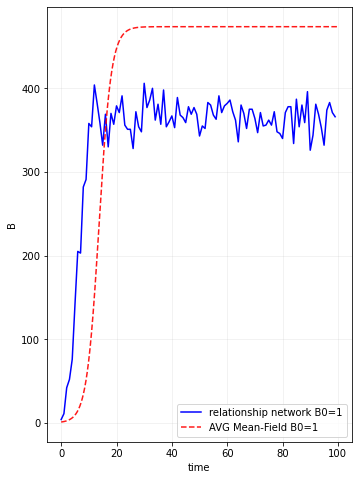

In [29]:
import copy
import networkx as nx
NW_graph=nx.newman_watts_strogatz_graph(n=1000,k=4,p=0.3)
C=nx.to_numpy_array(NW_graph)
def Bt_func(Beta,Gamma,N,B0,t):
    return 1/((1/(N*(1-Gamma/Beta)))+(1/B0-1/(N*(1-Gamma/Beta)))*np.exp(-(Beta-Gamma)*t))
def RealGillespie(C,N,B0,Beta,Gamma,Tmax):
    state=np.random.permutation([0]*(N-B0)+[1]*B0)
    T=[]
    B=[]
    for t in range(Tmax):
        last=copy.copy(state)
        T.append(t)
        for i in range(N):
            if state[i]==1:
                itl=np.round(int(np.random.normal(Beta)))
                if itl>0:
                    for ind in np.random.choice(np.where(C[i]==1)[0],itl):
                        state[ind]=1

        for x in range(len(last)):
            if last[x]==1:
                state[x]=np.random.choice([0*Gamma,1],1,False,p=[0.9,0.1])
        B.append(np.sum(state==1))
    return T,B
N=1000

T2,P2=RealGillespie(C,N,1,2,1,100)
fig=plt.figure(figsize = (12, 8))
ax121=fig.add_subplot(121)
#ax121.plot(T1,P1,color="blue",label="AVG gillespieABA B0=999")
ax121.plot(T2,P2,color="blue",label="relationship network B0=1")
#ax121.plot(np.arange(0,100,0.02),Bt_func(0.95,0.5,1000,999,np.arange(0,100,0.02)),color="blue",label="AVG Mean-Field B0=999",alpha=0.9,ls="--")
ax121.plot(np.arange(0,100,0.02),Bt_func(0.95,0.5,1000,1,np.arange(0,100,0.02)),color="red",label="AVG Mean-Field B0=1",alpha=0.9,ls="--")
#ax121.set_title("N=1000 with different B0 and R0")
ax121.set_xlabel("time")
ax121.set_ylabel("B")
#ax121.set_ylim(-1,100)
ax121.legend()
ax121.grid(alpha=0.2)
plt.show()

Now we are going to start thinking about the operating state of the model in the real world. The original model described in the question assumes that everyone can touch each other, which is almost impossible in actual situations. Therefore, we need to consider the connection between individuals and individuals. At this time, we can introduce a 2-dimensional matrix C to describe the connection between individuals. If the relationship network is introduced, then each individual will only be affected by the people connected to his node. Then this leads to individual state changes not only related to $\beta$ and $\gamma$, but also related to the tributary of the average node in the network. For our current Gillespie method, a relation matrix C can be added to the pair. This matrix uses the Watts-Strogatz network, the number of nodes is 4, and the increase probability is 0.3. Based on the above analysis, I redefine a function to simulate the spread of epidemics. According to the figure, you can see its changing trend (). In addition, I think the introduction of relational networks may not be enough for epidemiological models. We should also consider the deaths caused by diseases and the immunization situation, we also need to consider adding some noise, and consider the special circumstances of some super spreaders. However, these contents may not be studied in depth in this project. In future research, I will introduce the above contents as parameters to expand the original equations.

